# Abalone Age Prediction

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from scipy.stats import skew, zscore
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
df= pd.read_csv("abalone.csv")     # Reading and loading the dataset
df.head()                          # Creating a dataframe

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Exploratory Data Analysis(EDA)

In [3]:
# RangeIndex, missing values, datatype, memory usage
pd.set_option('display.max_rows', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


There are 4177 samples 9 columns. No null values in this dataset

In [4]:
# Shape of the dataset
df.shape

(4177, 9)

There are 4177 rows and 9 columns including target column.

In [5]:
# datatypes of given dataset
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

This dataset has three kind of datatypes. Out of them seven features are float, one feature is integer and one feature is object that contains string value.

In [6]:
#features (column names) in the dataset 
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Excluding 'Sex' feature all are Continuous data.

In [7]:
# checking missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There is no missing values in the dataset.

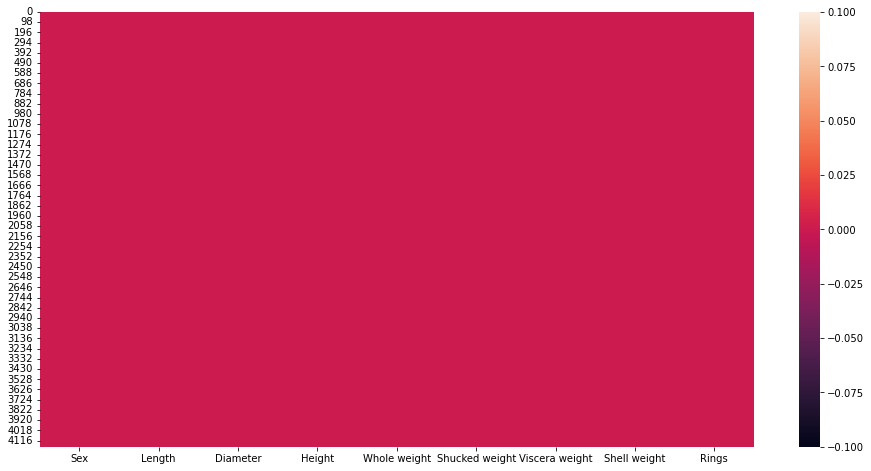

In [8]:
#another way to check missing values
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull())
plt.show()                  #visualizing null values using heatmap

From the above heatmap we can see no null values are there.

In [9]:
# Number of catagories of rings
df["Rings"].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

<AxesSubplot:xlabel='Rings', ylabel='count'>

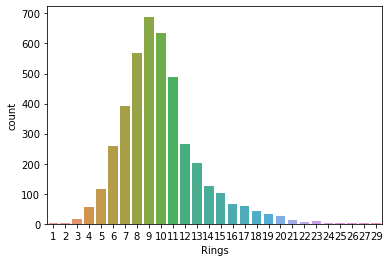

In [10]:
# To predict the age of the ring on the given feature.
sns.countplot(df.Rings)             
#visualizing the rings by using countplot

From above plot 9 rings has highest count, after that 10,8 and 11 rings has higher count values.

# Statistical summary

In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Correlation matrix

In [11]:
#checking correlation (multivariate analysis)
df.corr() 

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


All features are highly positively correlated to each other(no dropping of columns).

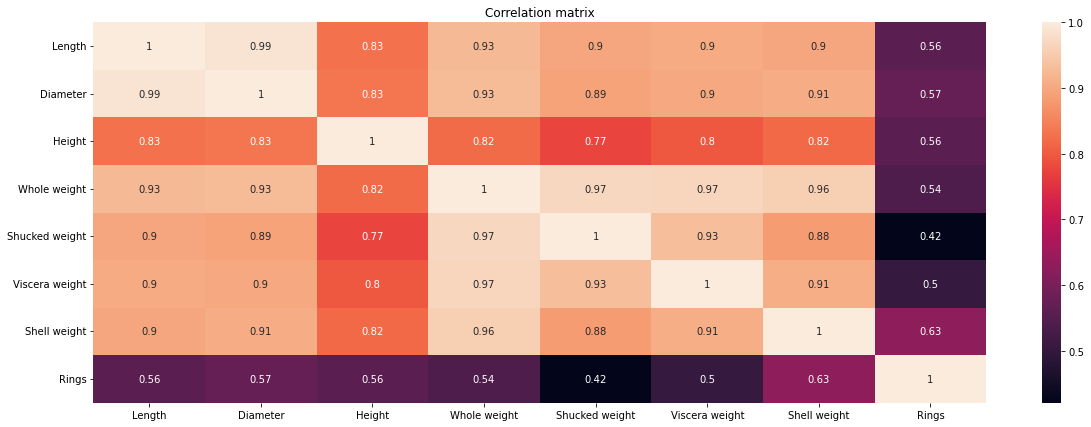

In [12]:
#checking correlation by using heatmap
plt.figure(figsize=(20,7))
plt.title("Correlation matrix")
sns.heatmap(df.corr(), annot=True)      #visualizing correlation by using heatmap
plt.show()

In [13]:
#example of univariate analysis
corr_matrix=df.corr()
corr_matrix["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64

Most of the matrix are correlated with length. If length is more then weight, height and diameter will also be more.

<AxesSubplot:title={'center':'Correlation with Rings'}>

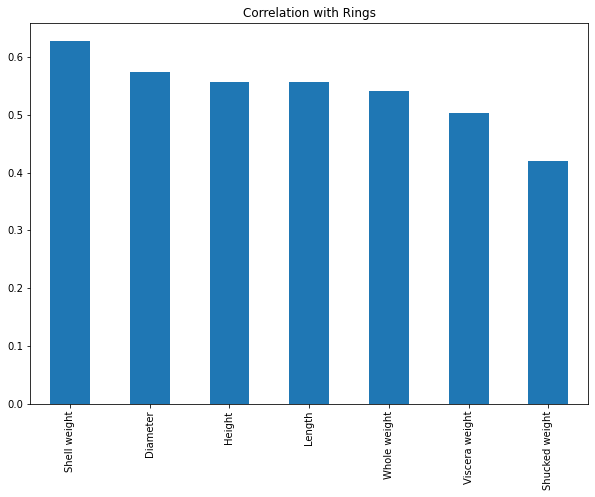

In [14]:
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',figsize=(10,7),title='Correlation with Rings')

# Data Visualizations

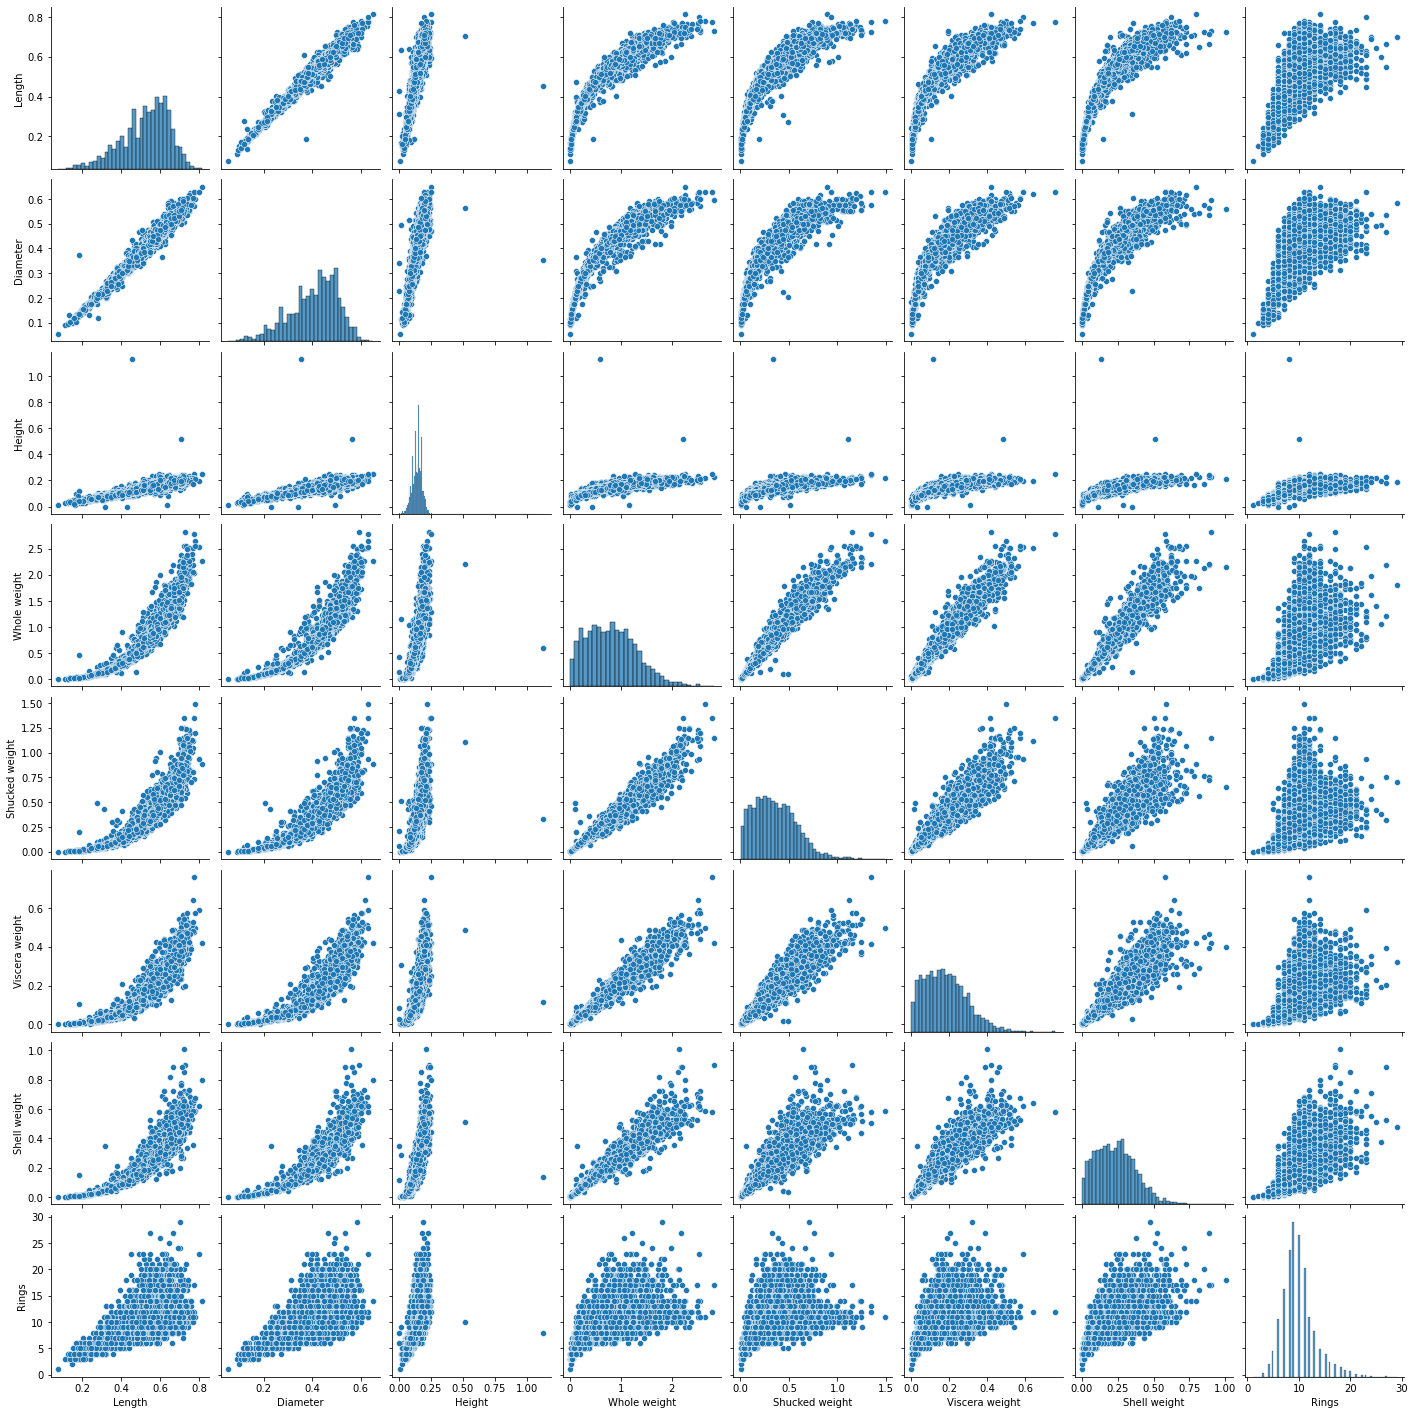

In [15]:
#visualizing using pairplot
sns.pairplot(df)

From the pairplot we can see that all the features are highly positively correlated.

# Scatter Plots

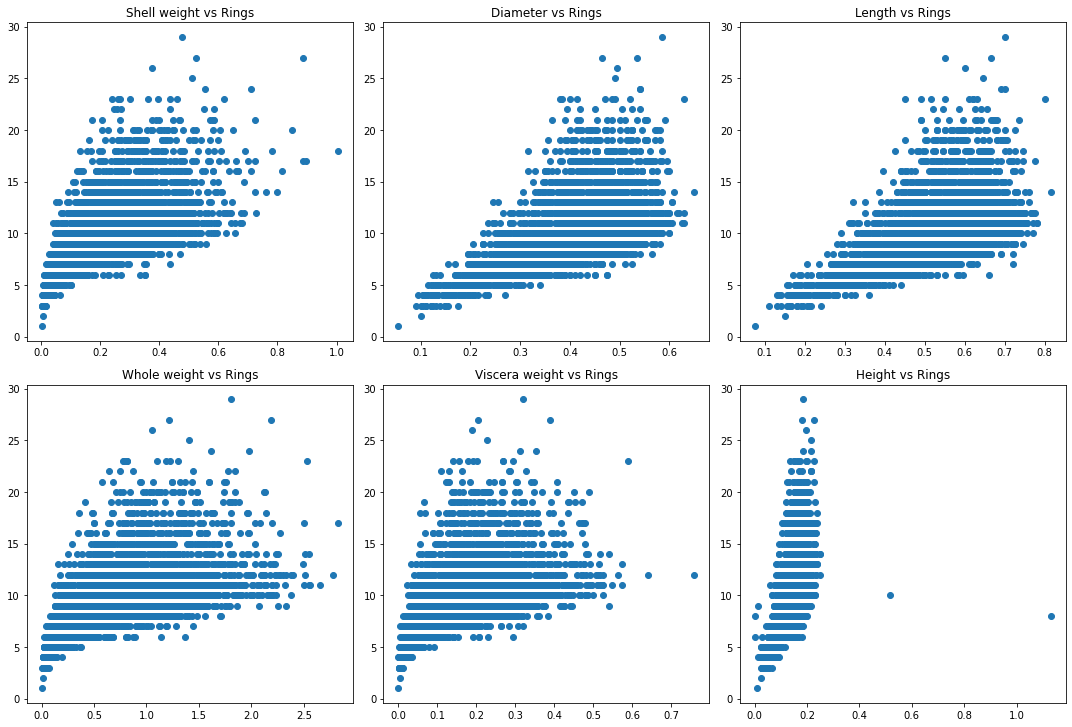

In [16]:
#comparing rings with all features using scatterplot and also checking outliers
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
plt.title('Shell weight vs Rings')
plt.scatter(df['Shell weight'],df['Rings'])    #examples of bivariate analysis

plt.subplot(3,3,2)
plt.title('Diameter vs Rings')
plt.scatter(df['Diameter'],df['Rings'])

plt.subplot(3,3,3)
plt.title('Length vs Rings')
plt.scatter(df['Length'],df['Rings'])

plt.subplot(3,3,4)
plt.title('Whole weight vs Rings')
plt.scatter(df['Whole weight'],df['Rings'])

plt.subplot(3,3,5)
plt.title('Viscera weight vs Rings')
plt.scatter(df['Viscera weight'],df['Rings'])

plt.subplot(3,3,6)
plt.title('Height vs Rings')
plt.scatter(df['Height'],df['Rings'])

plt.tight_layout()

# Pie Plot

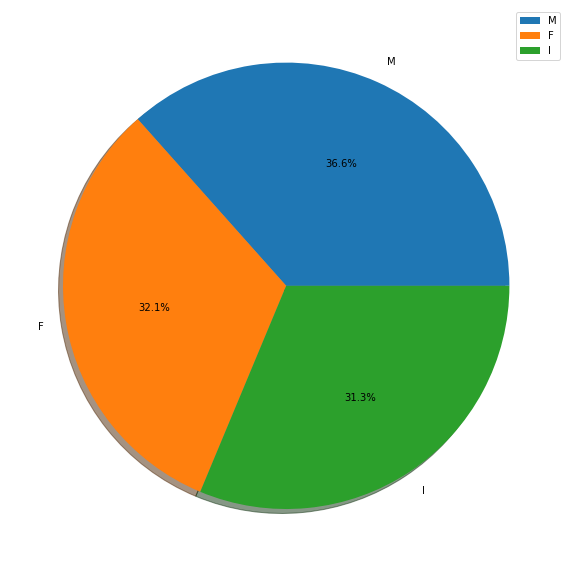

In [17]:
plt.figure(figsize=(10,12))
plt.pie(df['Sex'].value_counts(),labels=df.Sex.unique(),autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show()

In [18]:
#checking the values of column 'sex'
df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

'Sex' is divided into Male, Female and Infants. We need to encode this.

In [19]:
#label encoding of 'Sex' feature
label=LabelEncoder()
df["Sex"] = label.fit_transform(df["Sex"])

Three catagories of Sex: M=2, F=0, I=1 (We encoded the category sex)

In [20]:
#showing first 5 rows
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Plotting outliers

In [21]:
columns=df.columns
columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

All Features-Boxplot


<function matplotlib.pyplot.show(close=None, block=None)>

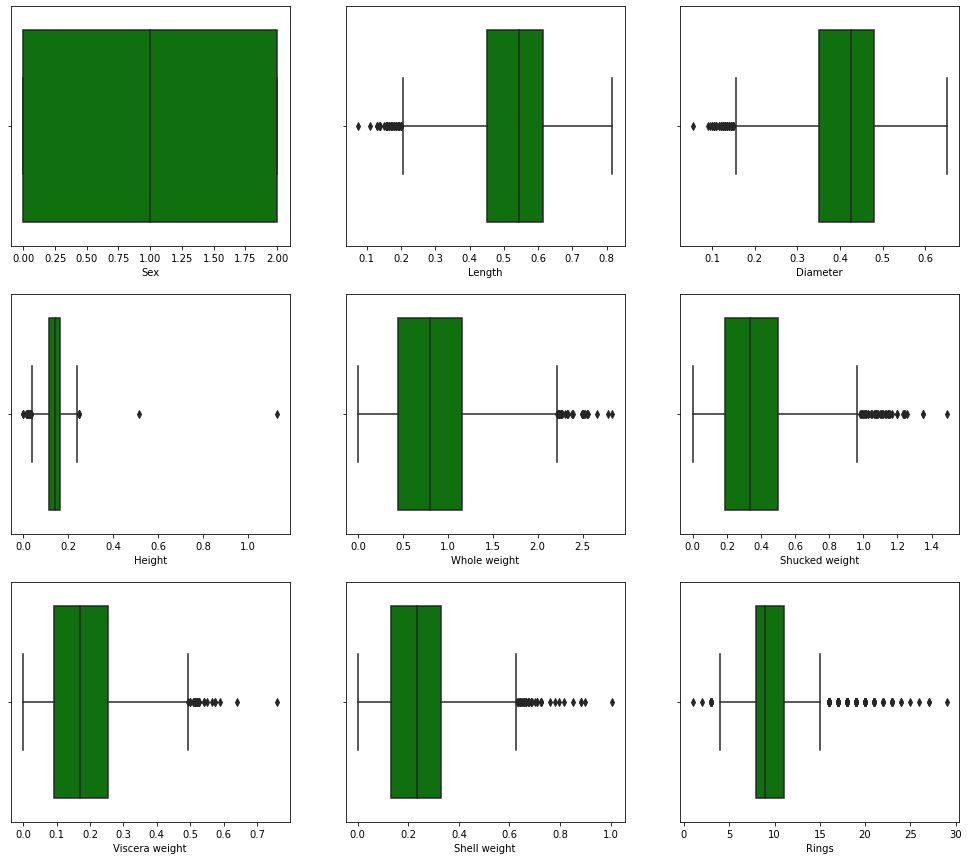

In [22]:
#checking outliers using boxplot
plt.figure(figsize=(17,15))
for i in range(0, len(columns)):
    plt.subplot(3,3, i+1)
    sns.boxplot(df[columns[i]], color='green')
print('All Features-Boxplot')
plt.show

# Removing Outliers

In [23]:
#using zscore technique
z=np.abs(zscore(df))

In [24]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [25]:
#checking dimension after the removal of outliers 
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 9)
(4027, 9)


# Percentage data loss

In [26]:
loss_percent=(4177-4027)/4177*100
print(loss_percent)

3.5910940866650707


So here 3.6% of data we lost after removing 150 rows.

# Count Plot

<AxesSubplot:xlabel='Sex', ylabel='count'>

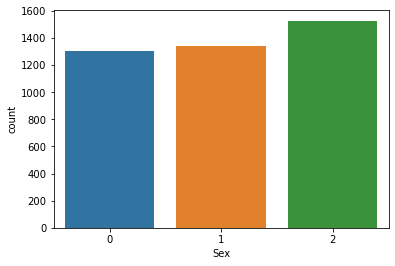

In [27]:
#viewing 'Sex' feature using countplot
sns.countplot(x='Sex', data=df) 
# male =2,female=0,infant=1

From the above plot no. of male is highest. female is lowest.

# Distribution Plots

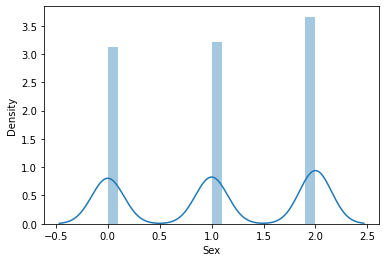

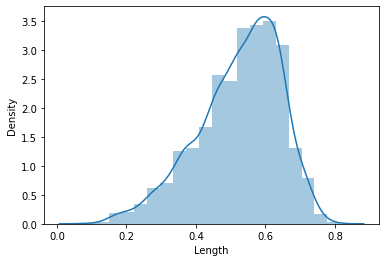

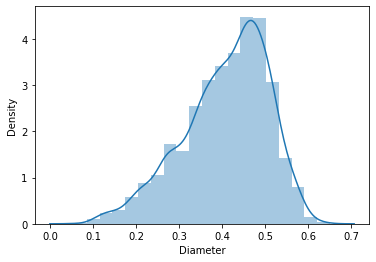

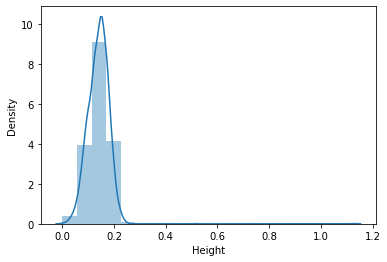

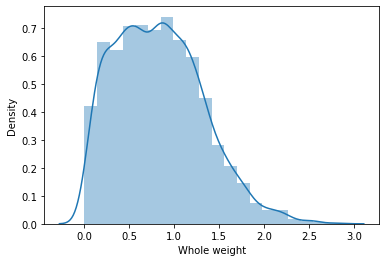

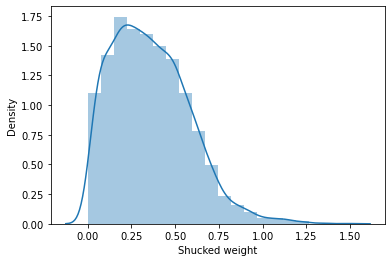

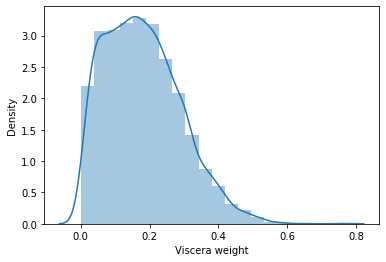

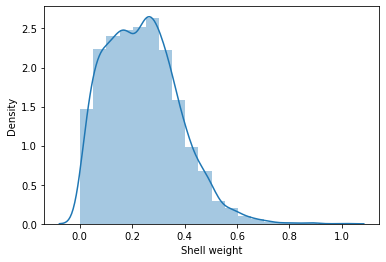

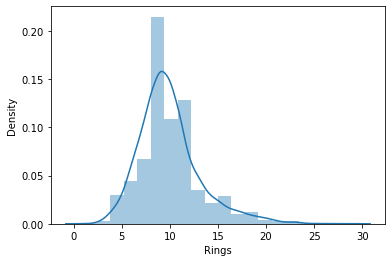

In [28]:
#visualizing all features with density by using distplot
for i in df.columns:
    plt.figure()
    sns.distplot(df[i], bins=20)

# Checking Skewness

In [29]:
#checking skewness of the data
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

# Train_test_split

In [30]:
#removing rings feature using pop command
Y = df.pop('Rings')

In [31]:
#splitting the data using train test split
x_train, x_test, y_train, y_test=train_test_split(df, Y, test_size=.30, random_state=45)

In [32]:
#for removing skewness
x_train.skew()

Sex              -0.080656
Length           -0.655605
Diameter         -0.622766
Height            4.063343
Whole weight      0.515000
Shucked weight    0.702454
Viscera weight    0.575359
Shell weight      0.622781
dtype: float64

In [33]:
# using power transform to skew data in one go
df_new=power_transform(x_train)
df_new=pd.DataFrame(df_new,columns=x_train.columns)
df_new.skew()

Sex              -0.169139
Length           -0.072897
Diameter         -0.070275
Height           -0.142984
Whole weight     -0.004845
Shucked weight    0.026693
Viscera weight    0.041209
Shell weight      0.023257
dtype: float64

So here we removed all the skewness by using power transform.

In [34]:
#dividing the features and vectors
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [35]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
0,0.009697,-0.658980,-0.606517,-0.847088,-0.700076,-0.556876,-0.718082
1,-1.297578,0.795357,0.577103,1.449110,0.858269,0.240663,0.876915
2,-1.297578,1.238688,0.958278,0.429885,1.107887,1.271804,1.011429
3,1.133085,-0.658980,-0.744120,-0.446528,-0.631750,-0.440838,-0.512446
4,-1.297578,1.594398,1.509540,0.429885,1.230365,1.190014,1.172418
5,1.133085,-0.081759,-0.054713,0.896909,-0.067501,-0.346772,-0.279861
6,1.133085,0.385700,0.279498,0.548841,0.424498,0.700594,0.308676
7,1.133085,-1.999732,-2.052877,-2.149248,-1.895405,-1.840936,-1.864026
8,0.009697,0.637888,0.577103,0.187422,0.065103,0.231621,0.529012
9,-1.297578,0.689857,0.701188,0.896909,0.579739,0.285527,0.439835


In [36]:
y

0      -0.952820
1       1.337525
2       0.758762
3      -0.753461
4       1.088036
5       0.292015
6       0.330411
7      -1.919640
8      -0.032204
9       1.256230
10     -0.639484
11     -0.718096
12      0.941863
13     -0.108554
14     -1.754363
15     -0.532455
16     -0.943576
17     -0.999306
18      0.295520
19      0.365011
20     -1.287892
21      0.371897
22      1.088036
23     -1.127083
24      0.152974
25     -2.032742
26      1.669872
27     -0.043571
28      1.144952
29     -0.427856
30     -1.438705
31     -1.841869
32      0.533771
33      0.389060
34     -1.337664
35      0.836108
36      0.467101
37      0.365011
38     -1.377838
39     -1.615207
40     -1.646992
41     -1.646992
42      2.225766
43     -1.847387
44     -1.141488
45      0.971552
46      0.586327
47     -0.682994
48      0.780574
49      1.570916
50     -0.861170
51     -1.209273
52      0.839170
53      0.224851
54      1.283531
55     -0.186259
56      0.224851
57      1.144952
58     -0.1589

# Scaling

In [37]:
#scaling on the feature column
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

By using StandardScaler we can scale the data in the range.

In [38]:
x_train

array([[-0.05277087, -0.54082955, -0.48905945, ..., -0.62019071,
        -0.74662077, -0.93120167],
       [-1.26733189,  0.79473115,  0.6208561 , ...,  0.09712768,
         0.80791482,  1.39192382],
       [-1.26733189,  1.12862133,  0.92356034, ...,  1.30774389,
         0.97155015,  0.67711598],
       ...,
       [-1.26733189,  0.83646742,  0.82265893, ...,  0.89138243,
         0.59882524,  0.89155833],
       [-1.26733189,  1.67119286,  1.52896883, ...,  1.31453239,
         1.9715438 ,  5.46632853],
       [ 1.16179015,  0.75299488,  0.87310963, ...,  0.99547279,
         1.18518515,  0.9344468 ]])

In [39]:
x_test

array([[ 1.16179015e+00,  6.27786065e-01,  5.19954686e-01, ...,
         3.89033271e-01,  7.15558549e-02,  3.91192838e-01],
       [-5.27708687e-02, -1.37555499e+00, -1.49807359e+00, ...,
        -1.33524627e+00, -1.31025356e+00, -1.18138442e+00],
       [-1.26733189e+00, -4.57357005e-01, -4.38608746e-01, ...,
        -8.89467960e-01, -7.05711941e-01, -7.16759321e-01],
       ...,
       [-5.27708687e-02,  1.74198603e-03, -8.54537975e-02, ...,
        -4.39163987e-01, -4.78440656e-01, -4.05817909e-01],
       [ 1.16179015e+00,  6.27786065e-01,  8.22658928e-01, ...,
         2.92114456e+00,  2.16245168e+00,  1.79221621e+00],
       [-5.27708687e-02, -2.33548924e+00, -2.35573561e+00, ...,
        -1.44612513e+00, -1.48297974e+00, -1.57452873e+00]])

# Building the model

# Cross Validation Score Method

In [40]:
models= [SVR(), GradientBoostingRegressor(), RandomForestRegressor(), RandomForestClassifier(), AdaBoostRegressor(), DecisionTreeRegressor(), KNeighborsRegressor()]
for m in models:
    print(m)
    print('Cross Validation Score:',np.mean(cross_val_score(m,x_train,y_train,scoring='neg_mean_squared_error', cv=10)))
SVR()

SVR()
Cross Validation Score: -4.686812782141698
GradientBoostingRegressor()
Cross Validation Score: -4.6128566457364055
RandomForestRegressor()
Cross Validation Score: -4.651394192341859
RandomForestClassifier()
Cross Validation Score: -6.291778484267615
AdaBoostRegressor()
Cross Validation Score: -8.674547684974542
DecisionTreeRegressor()
Cross Validation Score: -8.679411145916125
KNeighborsRegressor()
Cross Validation Score: -5.214480200102857


SVR()

In [41]:
forest=RandomForestRegressor(n_estimators=100)
forest.fit(x_train,y_train)

RandomForestRegressor()

In [42]:
pred=forest.predict(x_test)

In [43]:
np.sqrt(mean_squared_error(pred, y_test))

2.2308848310001577

In [44]:
r2_score(pred,y_test)

0.17475436702934777

# Hyper Parameter Tuning

In [45]:
grid= RandomizedSearchCV(forest, n_iter=20,param_distributions=dict(max_depth=np.arange(5,20+1),max_features=np.arange(1,len(df.columns))))

In [46]:
grid.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                                        'max_features': array([1, 2, 3, 4, 5, 6, 7])})

In [47]:
print(grid.best_params_)


{'max_features': 3, 'max_depth': 12}


Hyper parameter tunning of SVM is used to deal with large no. of multiclass classification problems and also deals with large dataset.

In [48]:
svmModel = SVR(kernel='linear', C=1, gamma=.1)
svmModel.fit(x_train, y_train)
pred = svmModel.predict(x_test)
r2_score(y_test,pred)

0.486320022228789

In [49]:
params = {'kernel': ['linear', 'rbf'], 'C': [ .1,1,10,.01],'gamma': [.1,1,10,.01,.001]}
sv = SVR()

In [50]:
g = GridSearchCV(sv, params, cv=5, scoring='r2')

In [51]:
g.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 0.01],
                         'gamma': [0.1, 1, 10, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             scoring='r2')

In [52]:
g.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [51]:
g.best_score_

0.5669028366878104

RandomForest and other Regression were giving upto 25%, tunning SVM gives upto 54.6% accuracy(deal with more complex datas).

In [53]:
svmModel = SVR(kernel='rbf', C=10, gamma=.1)
svmModel.fit(x_train, y_train)
pred = svmModel.predict(x_test)
r2_score(y_test,pred)

0.5480524134425478

In [54]:
np.sqrt(mean_squared_error(pred, y_test))

2.1688735110141426

# Approaching more regressors

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
lg=LogisticRegression()

In [93]:
lg.fit(x_train,y_train)

LogisticRegression()

In [94]:
pred=lg.predict(x_test)
print(pred)

[10  6  8 ...  8 11  5]


In [95]:
print('accuracy_score:',accuracy_score(pred,y_test))

accuracy_score: 0.2703349282296651


In [96]:
print(confusion_matrix(y_test,pred))

[[ 0  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  7  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3 10 20  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 32 15 15  2  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 29 38 48  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5 29 63 55 17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5 15 59 84 48 12  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 10 27 47 65 25  4  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  4 16 37 54 35  4  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 13 13 23 11  0  4  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  7  4 17  9  1  5  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  3 18  5  1  5  0  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  4 10  1  1  9  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3  1 10

In [61]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(x_train,y_train)
print('dtc score:',dtr.score(x_train,y_train))

dtrpredict=dtr.predict(x_test)
print('dtc r2_score:',r2_score(y_test,dtrpredict))

print('Mean squared error of dtc::',mean_squared_error(y_test,dtrpredict))
print('Root mean square of dtc::',np.sqrt(mean_squared_error(y_test,dtrpredict)))

dtc score: 1.0
dtc r2_score: 0.18863168133417718
Mean squared error of dtc:: 8.444976076555024
Root mean square of dtc:: 2.906024101165547


In [62]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print('dtc score:',knr.score(x_train,y_train))

knrpredict=knr.predict(x_test)
print('dtc r2_score:',r2_score(y_test,knrpredict))

print('Mean squared error of dtc::',mean_squared_error(y_test,knrpredict))
print('Root mean square of dtc::',np.sqrt(mean_squared_error(y_test,knrpredict)))

dtc score: 0.6699154440855046
dtc r2_score: 0.4855449837602429
Mean squared error of dtc:: 5.354609250398724
Root mean square of dtc:: 2.314002863092162


In [63]:
svr1=SVR()
svr1.fit(x_train,y_train)
print('dtc score:',svr1.score(x_train,y_train))

svr1predict=svr1.predict(x_test)
print('dtc r2_score:',r2_score(y_test,svr1predict))

print('Mean squared error of dtc::',mean_squared_error(y_test,svr1predict))
print('Root mean square of dtc::',np.sqrt(mean_squared_error(y_test,svr1predict)))

dtc score: 0.5614779622961489
dtc r2_score: 0.523164364555812
Mean squared error of dtc:: 4.9630549297225155
Root mean square of dtc:: 2.227791491527543


In [64]:
from sklearn.linear_model import SGDRegressor

sgd=SGDRegressor()
sgd.fit(x_train,y_train)
print('dtc score:',sgd.score(x_train,y_train))

sgd1predict=sgd.predict(x_test)
print('dtc r2_score:',r2_score(y_test,sgd1predict))

print('Mean squared error of dtc::',mean_squared_error(y_test,sgd1predict))
print('Root mean square of dtc::',np.sqrt(mean_squared_error(y_test,sgd1predict)))

dtc score: 0.5274699920707258
dtc r2_score: 0.5013836689489353
Mean squared error of dtc:: 5.189755244609421
Root mean square of dtc:: 2.2781034314994173


In [110]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()

model=[lg,gnb,svc,dtc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print( accuracy_score(y_test,predm))
    print( confusion_matrix(y_test,predm))
    print( classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.2703349282296651
[[ 0  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  7  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3 10 20  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 32 15 15  2  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 29 38 48  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5 29 63 55 17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5 15 59 84 48 12  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 10 27 47 65 25  4  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  4 16 37 54 35  4  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 13 13 23 11  0  4  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  7  4 17  9  1  5  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  3 18  5  1  5  0  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  4 10  1  1  9  1 

# Saving the model

In [111]:
filename ="Abalone_Age_Prediction.pkl"  #saving the model as a pickle
pickle.dump(svmModel, open(filename, 'wb')) 

# Conclusion

In [112]:
a=np.array(y_test)
predicted=np.array(svmModel.predict(x_test))
df_com= pd.DataFrame({"Original":a, "predicted": predicted}, index=range(len(a)))  #creating a data frame
df_com

,Original,predicted
0,11,10.142410
1,7,6.931526
2,9,9.490627
3,6,7.663055
4,12,11.460470
5,8,8.826361
6,7,9.510730
7,17,13.422369
8,9,7.585709
9,10,12.953812
